#**PREPARING DATA NOTEBOOK** 
This notebook will do the data pre-paration. The process show in the flow chart below.

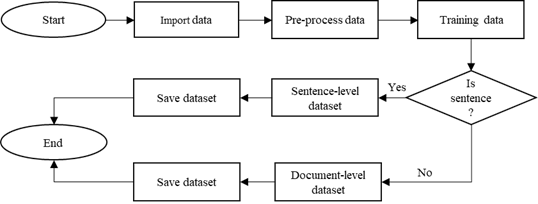

#Import Library

In [ ]:
!pip install transformers datasets -qq

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')

from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [ ]:
#run this step if you use Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')
'''

#Functions

In [ ]:
#function create balance dataset where each class is represented by the same number of samples
def generate_balance_data(df_dataset,datasize,num_labels,test_size=0.2):
  train = pd.DataFrame()
  val = pd.DataFrame()
  for i in range(0,num_labels):
    if len(df_dataset[df_dataset["label"] == i]) > 0:
      globals()['df_labels_%s' % i] = df_dataset[df_dataset["label"] == i].iloc[:datasize]#sample(n=datasize,random_state = 1)
      temp_train, temp_test = train_test_split(globals()['df_labels_%s' % i], test_size=test_size,random_state=1)
      train = train.append(temp_train)
      val =  val.append(temp_test)
    else:
      pass
  return train, val

In [ ]:
#function export DataFrame to CSV
#change the path when you run it
def export_csv_train_val_dataset(df, words_count, datasize,num_labels,filename, path="/content/drive/MyDrive/Colab Notebooks/Dataset/",document=True):
  #create a temp DataFrame
  df_csv = pd.DataFrame()
  df_csv = df.copy(deep=True)

  #create word count column in the dataset
  df_csv["words_count"] = df_csv['text'].str.split().str.len()

  #filter dataset to document level or sentence level
  if document == True:
    df_csv = df_csv[df_csv["words_count"] >= words_count]
  else:
    df_csv = df_csv[(df_csv["words_count"] >= 3) & (df_csv["words_count"] <= words_count)]
  
  #drop words_count column
  df_csv = df_csv.drop('words_count', axis=1)

  #create a train dataset and validataion dataset
  train, val = generate_balance_data(df_csv,datasize,num_labels)

  #export training and val dataset to csv file
  train_save_path = path + filename + "_train.csv"
  val_save_path = path + filename + "_val.csv"
  train.to_csv(train_save_path,index=False)
  val.to_csv(val_save_path,index=False)

#Process Data

##Amazon dataset

In [ ]:
#download dataset from Hugging Face
amazon_polarity = load_dataset('amazon_polarity',split='train[:10%]')

In [ ]:
#convert Dataset into DataFrame
df_amazon_polarity_train = pd.DataFrame(amazon_polarity)

In [ ]:
#rename columns
df_amazon_polarity_train.rename(columns = {'content':'text'}, inplace = True)
#drop unnecessary columns
df_amazon_polarity_train.drop("title",inplace=True,axis=1)

In [ ]:
df_amazon_polarity_train.head()

In [ ]:
#get number of label in dataset
num_label = len(df_amazon_polarity_train["label"].unique())

###Sentence level dataset

In [ ]:
#export sentence level dataset to csv
export_csv_train_val_dataset(df_amazon_polarity_train,35,25000,num_label,"amazon_polarity_sent",document=False)

###Document level dataset

In [ ]:
#export document level dataset to csv
export_csv_train_val_dataset(df_amazon_polarity_train,150,10000,num_label,"amazon_polarity_doc",document=True)

##Yelp dataset

In [ ]:
yelp_review = load_dataset('yelp_review_full')

In [ ]:
#Overall
yelp_review_train = yelp_review["train"]
df_yelp_review_train = pd.DataFrame(yelp_review_train)
df_yelp_review_train = df_yelp_review_train[df_yelp_review_train['label'].isin([0,2,4])]

In [ ]:
def change_label(label):
  if label == 0:
    return 0
  elif label == 4:
    return 1 
  else:
    return 2

In [ ]:
#changing label for calculation
df_yelp_review_train['label'] = df_yelp_review_train['label'].apply(change_label)

In [ ]:
df_yelp_review_train['words_count'] = df_yelp_review_train['text'].str.split().str.len()

In [ ]:
df_yelp_review_train

In [ ]:
#get number of label in dataset
num_label = len(df_yelp_review_train["label"].unique())
num_label

###Sentence level dataset

In [ ]:
#create export sentence level dataset to csv file
export_csv_train_val_dataset(df_yelp_review_train,35,15000,num_label,"yelp_review_sent",document=False)

###Document level dataset

In [ ]:
#create export sentence level dataset to csv file
export_csv_train_val_dataset(df_yelp_review_train,300,6000,num_label,"yelp_review_doc",document=True)

##DBPedia dataset

In [ ]:
dbpedia_14 = load_dataset('dbpedia_14',split="train[:100%]")

In [ ]:
df_dbpedia_14 = pd.DataFrame(dbpedia_14)

In [ ]:
df_dbpedia_14.rename(columns = {'content':'text'}, inplace = True)
#drop unnecessary columns
df_dbpedia_14.drop("title",inplace=True,axis=1)

In [ ]:
df_dbpedia_14['words_count'] = df_dbpedia_14['text'].str.split().str.len()

In [ ]:
#get number of label in dataset
num_label = 8

###Sentence level dataset

In [ ]:
#export sentence level dataset to csv
export_csv_train_val_dataset(df_dbpedia_14,35,3000,8,"dbpedia_sent",document=False)

###Document level dataset

In [ ]:
#export document level dataset to csv
export_csv_train_val_dataset(df_dbpedia_14,80,1000,num_label,"dbpedia_doc",document=True)

##AG News

In [ ]:
#download from file from https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
ag_news_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv')

In [ ]:
ag_news_train

In [ ]:
#get text and label column
df_ag_news_train = ag_news_train[["Class Index","Description"]]

#rename the columns
df_ag_news_train.rename(columns = {'Class Index':'label', 'Description':'text'}, inplace = True)

In [ ]:
#change the label of dataset for calculate
def change_label(label):
  return int(label)-1

#re-calculate the label
df_ag_news_train['label'] = df_ag_news_train['label'].apply(change_label)

In [ ]:
#create words_count column
df_ag_news_train['words_count'] = df_ag_news_train['text'].str.split().str.len()

In [ ]:
df_ag_news_train

In [ ]:
#get number of label in dataset
num_label = len(df_ag_news_train["label"].unique())

###Sentence level dataset

In [ ]:
#export sentence level dataset to csv
export_csv_train_val_dataset(df_ag_news_train,35,12000,8,"ag_news_sent",document=False)

###Document level dataset

In [ ]:
#export document level dataset to csv
export_csv_train_val_dataset(df_ag_news_train,36,5000,num_label,"ag_news_doc",document=True)